OPERATIONS DEPARTMENT
AI/ML/DL has been revolutionizing healthcare and medicine:
- Medical imagery 
- Drug research 
- Genome development 
Deep learning has been proven to be superior in detecting and classifying disease using imagery data.
- In this case study, a hospital in downtown Toronto has been asked us to automate the process of detecting and classifying chest disease and reduce the cost and time of detection. The team has collected extensive X-Ray chest data and they approached you to develop a model that could detect and classify the diseases in less than 1 minute. 
We have been provided with 133 images that belong to 4 classes: 
- Healthy 
- Covid-19
- Bacterial Pneumonia
- Viral Pneumonia 

In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.0/39.5 MB 2.0 MB/s eta 0:00:20
   - -------------------------------------- 1.6/39.5 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.8/39.5 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.4/39.5 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.9/39.5 MB 2.0 MB/s eta 0:00:18
   --- ------------------------------------ 3.4/39.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.9/39.5 MB 2.2 MB/s eta 0:00:17
   ---- ----------------------------------- 4.7/39.5 MB 2.3 MB/s eta 0:00:15
   ----- ---------------------------------- 5.2/39.5 MB 2.3 MB/s eta 0:00:15
   ------ --------------------------------- 6.0/39.5 MB 2.4 MB/s eta 0:00:14
   ------ ---

In [3]:
# Basic libraries for file handling, image processing, and numerical operations
import os
import cv2  # OpenCV for image handling
import tensorflow as tf  # Main deep learning framework
import numpy as np  # Numerical operations with arrays

# Keras layers and optimizers for building models
from tensorflow.keras import layers, optimizers

# Pre-trained ResNet50 model for transfer learning
from tensorflow.keras.applications.resnet50 import ResNet50

# Commonly used layers for building CNN architectures
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout

# For creating and loading models
from tensorflow.keras.models import Model, load_model

# Keras backend operations
from tensorflow.keras import backend as K

# Image data generator for preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Callbacks to improve training performance
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

# Visualization and data analysis libraries
import matplotlib.pyplot as plt  # For plotting images and metrics
import seaborn as sns  # For more advanced visualizations
import pandas as pd  # For working with tabular data


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Kendi bilgisayarındaki dataset klasörünün yolu
XRay_Directory = r'C:\Users\ezoyd\Downloads\Data+Science+for+Business+Package\Data Science for Business Package\4. Operations Department\Dataset'

In [9]:
# List the folders in the directory
os.listdir(XRay_Directory)

['0', '1', '2', '3']

In [10]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation  
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

In [11]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")

Found 428 images belonging to 4 classes.


In [13]:
# Create a validation data generator
# - Loads images from directory
# - Resizes them to 256x256
# - Normalizes pixel values (handled by image_generator)
# - Uses 20% of the data as validation set
# - Labels are one-hot encoded for multi-class classification
# - Shuffles the images
validation_generator = image_generator.flow_from_directory(
    batch_size=40,
    directory=XRay_Directory,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 4 classes.


In [14]:
# Generate a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [17]:
# Check the shape of training images
# For example: (428, 256, 256, 3) means 428 RGB images of size 256x256
train_images.shape

(40, 256, 256, 3)

In [18]:
# Check the shape of training labels
# For example: (428, 4) means 428 labels in one-hot encoded format for 4 classes
train_labels.shape

(40, 4)

In [19]:
# View the training labels (one-hot encoded)
train_labels

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]],

In [20]:
# Create a dictionary to map numeric labels to readable class names
label_names = {
    0: 'Covid-19',
    1: 'Normal',
    2: 'Viral Pneumonia',
    3: 'Bacterial Pneumonia'
}

VISUALIZE DATASET

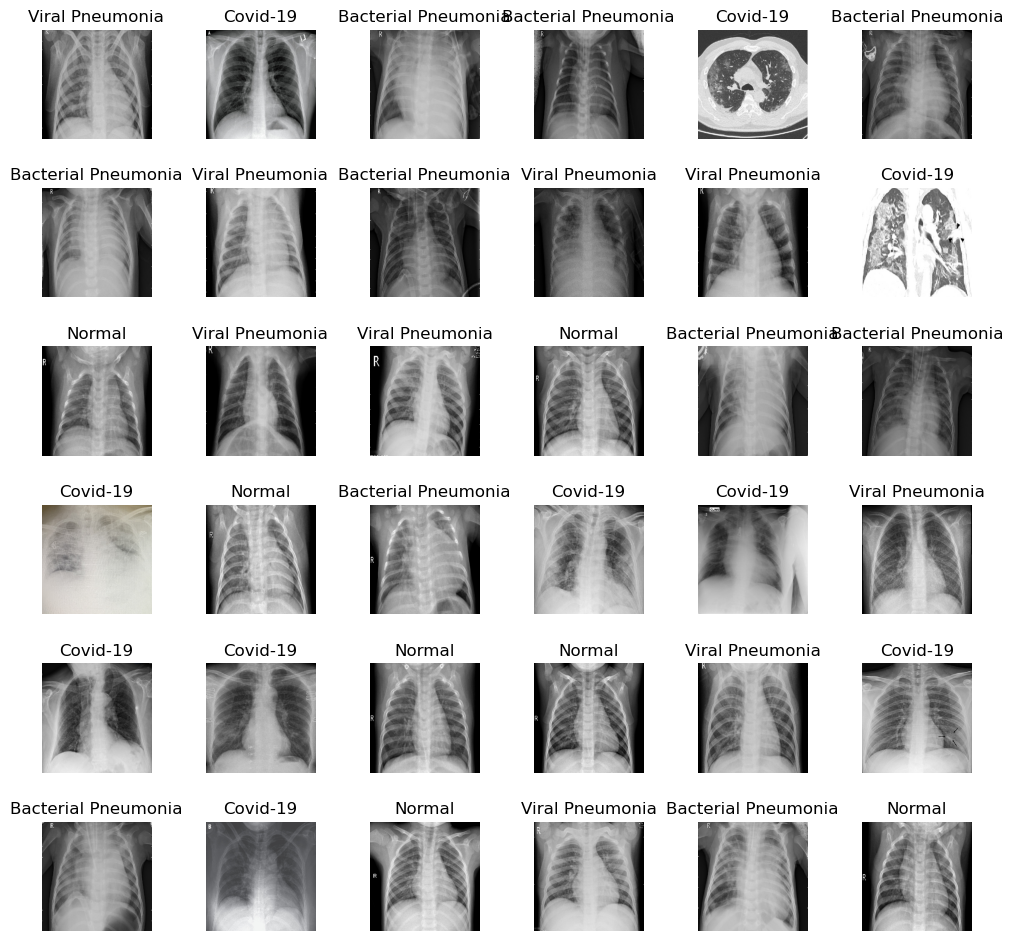

In [21]:
# Create a 6x6 grid to display 36 sample images with their labels
L = 6  # Number of rows
W = 6  # Number of columns

# Create subplots and flatten the axes array
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()  # Convert 2D array of axes to 1D for easier indexing

# Loop through the first 36 training images
for i in np.arange(0, L * W):
    axes[i].imshow(train_images[i])  # Show the image
    axes[i].set_title(label_names[np.argmax(train_labels[i])])  # Show the label
    axes[i].axis('off')  # Hide axis ticks

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

IMPORT MODEL WITH PRETRAINED WEIGHTS

In [22]:
# Load the ResNet50 model with pretrained ImageNet weights
# - Exclude the top (classification) layers since we will add our own
# - Set the input shape to match our dataset (256x256 RGB images)

basemodel = ResNet50(
    weights='imagenet',         # Use weights pre-trained on ImageNet
    include_top=False,          # Do not include the final classification layer
    input_tensor=Input(shape=(256, 256, 3))  # Input shape for our images
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [23]:
basemodel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [24]:
# Freeze all layers in the base model except the last 10 layers
# This allows fine-tuning only on the deeper layers (Stage-5) of ResNet50

for layer in basemodel.layers[:-10]:
    layer.trainable = False  # Freeze the layer (do not update weights during training)

BUILD AND TRAIN DEEP LEARNING MODEL

In [25]:
# Start building the custom classification head on top of the base ResNet50 model
headmodel = basemodel.output  # Get the output from the base model

# Reduce feature map size using average pooling
headmodel = AveragePooling2D(pool_size=(4, 4))(headmodel)

# Flatten the output to feed into dense layers
headmodel = Flatten(name='flatten')(headmodel)

# Fully connected layer with 256 units and ReLU activation
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)  # Drop 30% of units to prevent overfitting

# Another dense layer with 128 units
headmodel = Dense(128, activation='relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)  # Drop 20% of units

# Final classification layer with 4 units (for 4 classes), using softmax
headmodel = Dense(4, activation='softmax')(headmodel)

# Combine base model and custom head into a final model
model = Model(inputs=basemodel.input, outputs=headmodel)

In [28]:
# Compile the model with categorical crossentropy loss and RMSprop optimizer
model.compile(
    loss='categorical_crossentropy',        # Use categorical crossentropy for multi-class classification
    optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),  # RMSprop optimizer with learning rate and decay
    metrics=["accuracy"]                    # Track accuracy during training
)

In [30]:
# Set up callbacks
earlystopping = EarlyStopping(             # Stop training early if validation loss doesn't improve
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=20
)

checkpointer = ModelCheckpoint(            # Save the model with the lowest validation loss
    filepath="weights.keras",              # Changed from .hdf5 to .keras to match the required format
    verbose=1,
    save_best_only=True
)

In [31]:
# Create training and validation generators
train_generator = image_generator.flow_from_directory(
    batch_size=4,
    directory=XRay_Directory,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
    subset="training"
)

val_generator = image_generator.flow_from_directory(
    batch_size=4,
    directory=XRay_Directory,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
    subset="validation"
)

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [33]:
# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // 4,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.n // 4,
    callbacks=[checkpointer, earlystopping]  # Apply callbacks during training
)

C:\Users\ezoyd\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.2814 - loss: 1.5585
Epoch 1: val_loss improved from inf to 1.34426, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 77s 623ms/step - accuracy: 0.2818 - loss: 1.5572 - val_accuracy: 0.3269 - val_loss: 1.3443
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.5005 - loss: 1.0603
Epoch 2: val_loss did not improve from 1.34426
107/107 ━━━━━━━━━━━━━━━━━━━━ 62s 578ms/step - accuracy: 0.5007 - loss: 1.0604 - val_accuracy: 0.2500 - val_loss: 2.5158
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6277 - loss: 0.8490
Epoch 3: val_loss did not improve from 1.34426
107/107 ━━━━━━━━━━━━━━━━━━━━ 62s 580ms/step - accuracy: 0.6276 - loss: 0.8494 - val_accuracy: 0.4519 - val_loss: 1.4069
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6533 - loss: 0.8232
Epoch 4: val_loss improved from 1.34426 to 1.05826, saving model to weights.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 64s 5

EVALUATE TRAINED DEEP LEARNING MODEL

In [34]:
# Check available metrics recorded during training
history.history.keys()  # ['accuracy', 'loss', 'val_accuracy', 'val_loss']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

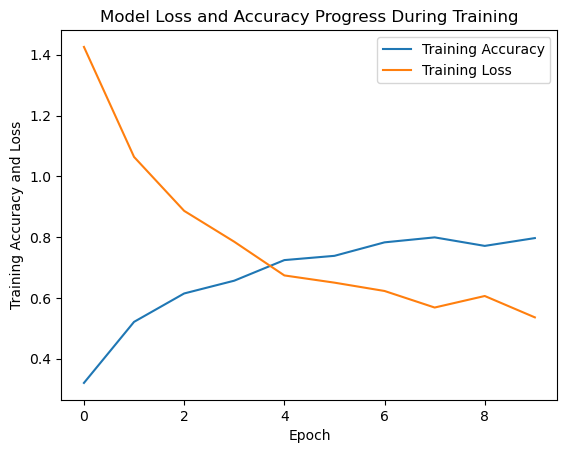

In [36]:
# Plot training accuracy and loss
plt.plot(history.history['accuracy'])        # Training accuracy per epoch
plt.plot(history.history['loss'])            # Training loss per epoch
plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])  # Add legend

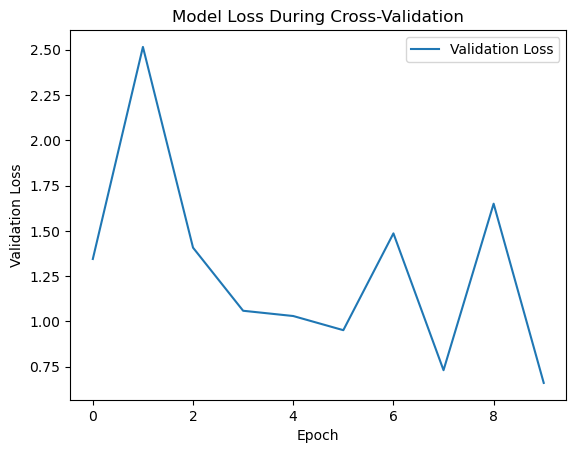

In [37]:
plt.show()  # Show the plot

# Plot validation loss
plt.plot(history.history['val_loss'])        # Validation loss per epoch
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])  # Add legend

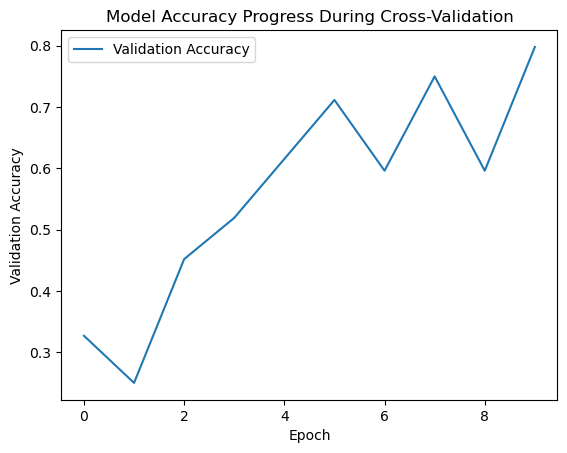

In [38]:
plt.show()  # Show the plot

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])    # Validation accuracy per epoch
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])  # Add legend

plt.show()  # Show the plot

In [39]:
test_directory = r'C:\Users\ezoyd\Downloads\Data+Science+for+Business+Package\Data Science for Business Package\4. Operations Department\Test'

In [41]:
# Create an ImageDataGenerator for test data with rescaling
test_gen = ImageDataGenerator(rescale = 1./255)

# Load test images from the directory (must contain subfolders for each class: 0, 1, 2, 3)
test_generator = test_gen.flow_from_directory(
    batch_size = 40, 
    directory = test_directory,     
    shuffle = True,                 
    target_size = (256, 256), 
    class_mode = 'categorical'      # For multi-class classification
)

# Evaluate the model on

Found 40 images belonging to 4 classes.


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [43]:
len(original)

40

In [44]:
from sklearn.metrics import accuracy_score

# Get the predicted class indices
prediction = np.argmax(model.predict(test_generator), axis=1)

# Get the true class labels
original = test_generator.classes

# Calculate accuracy between predicted and true labels
score = accuracy_score(original, prediction)

# Print the final accuracy score
print("Test Accuracy : {}".format(score))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Test Accuracy : 0.3


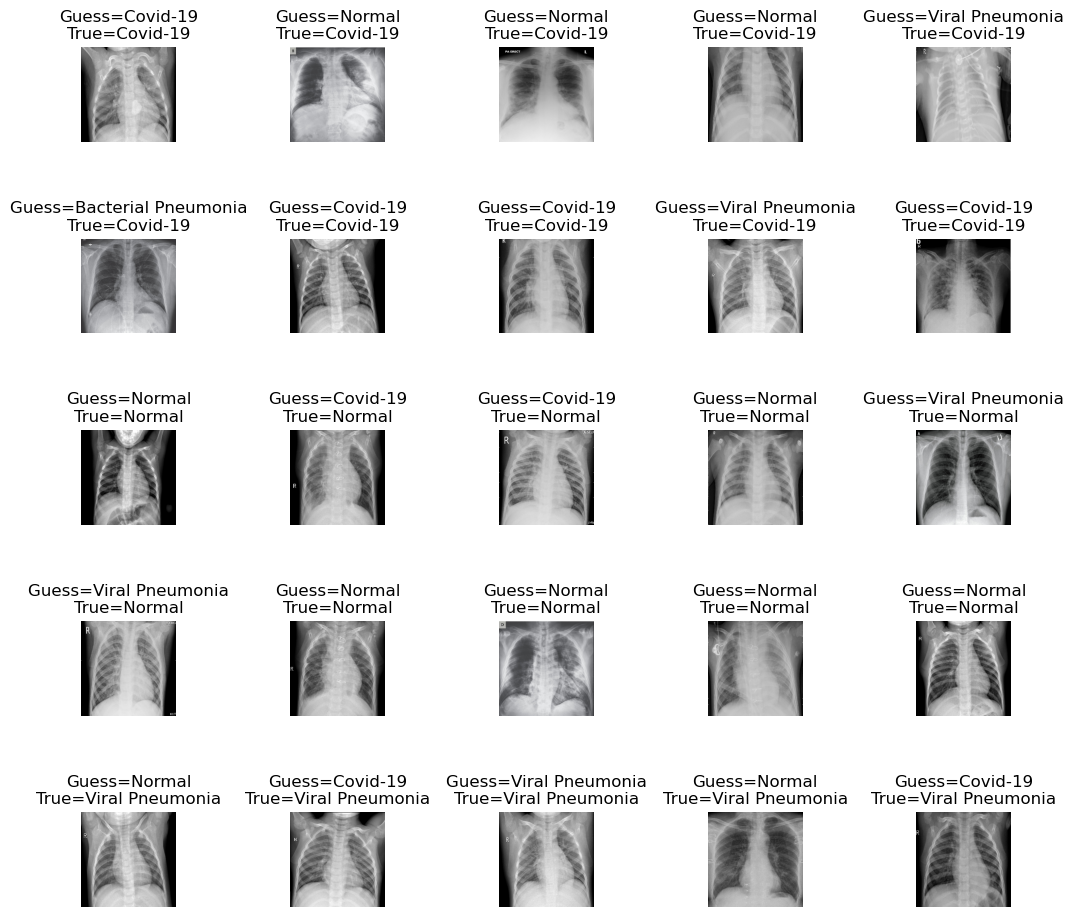

In [46]:
# Get a batch of images from the test set
image, _ = next(test_generator)  # Changed .next() to next()

# Set grid dimensions
L = 5
W = 5

# Create a grid of subplots
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

# Loop through the images and show prediction vs actual
for i in np.arange(0, L * W):
    axes[i].imshow(image[i])  # Show the image
    axes[i].set_title('Guess={}\nTrue={}'.format(
        str(label_names[prediction[i]]), 
        str(label_names[original[i]])
    ))
    axes[i].axis('off')  # Hide axis lines

# Adjust spacing between plots
plt.subplots_adjust(wspace=1.2)


In [47]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.31      0.40      0.35        10
           1       0.33      0.60      0.43        10
           2       0.17      0.10      0.12        10
           3       0.33      0.10      0.15        10

    accuracy                           0.30        40
   macro avg       0.29      0.30      0.26        40
weighted avg       0.29      0.30      0.26        40



Text(0.5, 1.0, 'Confusion_matrix')

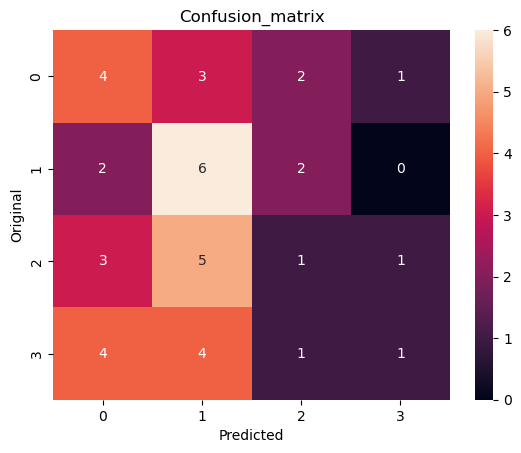

In [48]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')